<h1> For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.</h1



## 1.Has the network latency gone up since we switched internet service providers?

#### Null Hypothesis: Network latency has remained the same since switching internet service providers.
#### Alternative Hypothisis: Network Latency has signigicant diffrences  since switching internet service providers.

#### True positive: Reject null Hypothesis
#### True negative: Accept Null Hypothesis
#### Type 1 : Reject the null hypothesis when the null hypothesis is true.
#### Type 2 : Accept the alternative when hypothesis is false.

## 2. Is the website redesign any good?

#### Null Hypothesis: The website design is the same as to was previously.
#### Alternative Hypothesis: The redesign has been significantly diffrent then the original.

#### True positive: Reject null Hypothesis
#### True negative: Accept Null Hypothesis
#### Type 1 : Reject the null hypothesis when the null hypothesis is true.
#### Type 2 : Accept the alternative when hypothesis is false.

## 3.Is our television ad driving more sales?

#### Null Hypothesis: our sales have remained the same , regardless of our Television ad
#### Althernative Hypothesis: Our sales have seen a dramatic change due to our Television Ad

#### True positive: Reject null Hypothesis
#### True negative: Accept Null Hypothesis
#### Type 1 : Reject the null hypothesis when the null hypothesis is true.
#### Type 2 : Accept the alternative when hypothesis is false.


## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [70]:
import math as m
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from env import user, password,host
from pydataset import data


def get_db_url(user,password,host,db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
url = get_db_url(user,password,host,'employees')

office_1_mean = 90
office_1_std = 15
office_1_shape = 40

office_2_mean = 100
office_2_std = 20
office_2_shape = 50


alpha = 0.05

In [59]:
degf = office_1_shape + office_2_shape - 2

In [60]:
s_p = m.sqrt(((office_1_shape - 1) * office_1_std**2 + (office_2_shape - 1) * office_2_std**2) / (degf))
s_p

17.956702977389302

In [61]:
t = (office_1_mean - office_2_mean) / (s_p * m.sqrt(1/office_1_shape + 1/office_2_shape))
t

-2.6252287036468456

In [62]:
#solve using ttest from stats
s = stats.ttest_ind_from_stats(office_1_mean, office_1_std, office_1_shape,office_2_mean, office_2_std, office_2_shape, equal_var = False)
s

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

In [63]:
(s.statistic != 0 and s.pvalue < alpha)

True

#### There is a difference in avg time it takes to sell a home for both offices

### Load the mpg dataset and use it to answer the following questions:
### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
### Are compact cars more fuel-efficient than the average car?
### Do manual cars get better gas mileage than automatic cars?

In [64]:
from pydataset import data

In [65]:
mpg = data('mpg')

In [66]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [67]:
mpg["avg_mpg"] = stats.hmean(mpg[['cty','hwy']], axis=1)


In [68]:
fe_1999 = mpg[mpg["year"] == 1999].avg_mpg
fe_2008 = mpg[mpg["year"] == 2008].avg_mpg

In [69]:
fe_1999.var(), fe_2008.var()

(25.850396545865912, 22.550836772260343)

In [70]:
alpha = 0.05
t, p = stats.ttest_ind(fe_1999,fe_2008, equal_var=False)

In [71]:
t, p, alpha

(0.3011962975077886, 0.7635358418225436, 0.05)

In [72]:
#There is a differnce in fuel effeciency for 1999 and 2008 cars, we reject our null hypothesis 

In [73]:
compact_car = mpg[(mpg['class'] == 'compact')].avg_mpg
overall_avg = mpg.avg_mpg.mean()

In [74]:
t, p= stats.ttest_1samp(compact_car, overall_avg)

In [75]:
t, p/2 , alpha

(7.512360093161354, 7.808833174403864e-10, 0.05)

In [76]:
#compact cars are more fuel effeciant than the overall avg, we reject our null hypothesis

In [77]:
mpg["is_auto"] = mpg.trans.str.contains('auto')

In [78]:
fe_man = mpg[mpg["is_auto"] == True].avg_mpg
fe_auto = mpg[mpg["is_auto"] == False].avg_mpg

In [79]:
fe_man.var(), fe_auto.var()

(20.428279095002054, 25.665633639828275)

In [80]:
t, p = stats.ttest_ind(fe_man,fe_auto, equal_var=False)

In [81]:
t,p/2,alpha

(-4.47444321386703, 7.99035135103976e-06, 0.05)

In [82]:
#manual cars do not get better fuel effeciancy than automatics , we reject the null hypothesis

In [83]:
#correlation

In [84]:
#Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [85]:
churn = pd.read_csv('Cust_Churn_Telco.csv')
churn = churn.dropna()
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


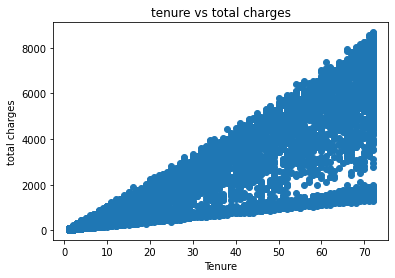

In [86]:
x = churn.tenure
y = churn.TotalCharges
plt.scatter(x,y)
plt.xlabel("Tenure")
plt.ylabel("total charges")
plt.title("tenure vs total charges")

churn.info()

In [87]:
r , p =stats.pearsonr(x,y)

In [88]:
r,p

(0.8258804609332093, 0.0)

In [89]:
#tenure and total charges are strongly positivly correlated

Text(0.5, 1.0, 'monthly vs total charges')

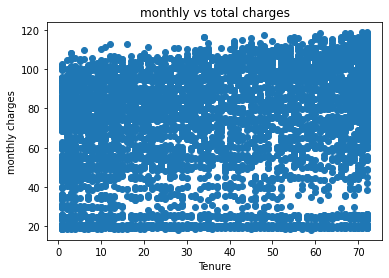

In [90]:
#monthly?
x = churn.tenure
y = churn.MonthlyCharges
plt.scatter(x,y)
plt.xlabel("Tenure")
plt.ylabel("monthly charges")
plt.title("monthly vs total charges")

In [91]:
r , p =stats.pearsonr(x,y)

In [92]:
r, p

(0.2468617666408957, 3.9898213232510553e-98)

In [93]:
#no correlation between tenure and monthly charges

Text(0.5, 1.0, "vs total charges where phone service is 'yes'")

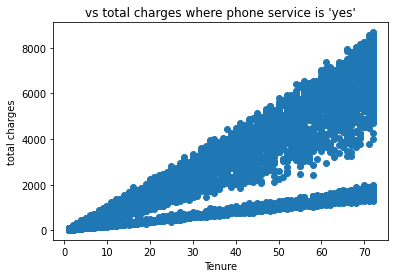

In [94]:
#control for phone
x = churn.tenure.where(churn.PhoneService == "Yes")
x = x.dropna()
y = churn.TotalCharges.where(churn.PhoneService == "Yes")
y = y.dropna()
plt.scatter(x,y)
plt.xlabel("Tenure")
plt.ylabel("total charges")
plt.title("vs total charges where phone service is 'yes'")

In [95]:
r , p = stats.pearsonr(x,y)

In [96]:
r, p

(0.8298393210699477, 0.0)

Text(0.5, 1.0, "vs total charges where phone service is 'no'")

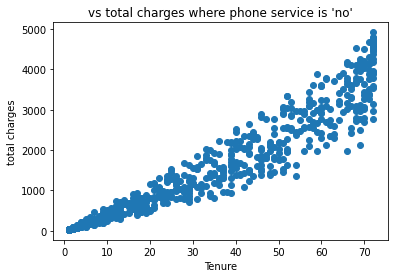

In [97]:
x = churn.tenure.where(churn.PhoneService == "No")
x = x.dropna()
y = churn.TotalCharges.where(churn.PhoneService == "No")
y = y.dropna()
plt.scatter(x,y)
plt.xlabel("Tenure")
plt.ylabel("total charges")
plt.title("vs total charges where phone service is 'no'")

In [98]:
r , p = stats.pearsonr(x,y)

In [99]:
r, p
#string positive correlation, reject null hypothesis

(0.9534228506954507, 0.0)

In [100]:
churn["no_internet"] = churn.InternetService.str.contains('No')

Text(0.5, 1.0, 'tenure vs total charges for customers with no internet')

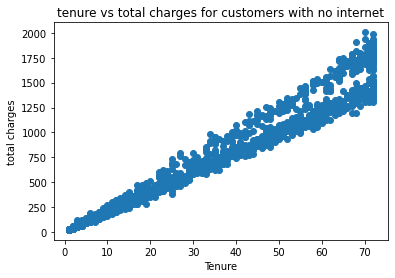

In [101]:
x = churn.tenure.where(churn.no_internet == True)
x = x.dropna()
y = churn.TotalCharges.where(churn.no_internet == True)
y = y.dropna()
plt.scatter(x,y)
plt.xlabel("Tenure")
plt.ylabel("total charges")
plt.title("tenure vs total charges for customers with no internet")

In [102]:
r , p = stats.pearsonr(x,y)
r,p
#strong positive correlation, reject null hypothesis

(0.9814648859044319, 0.0)

Text(0.5, 1.0, 'tenure vs total charges for customers with internet')

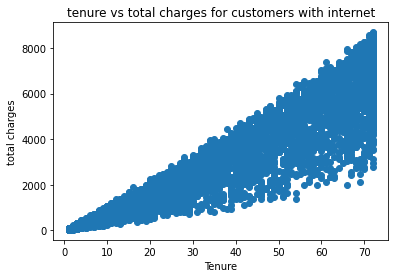

In [103]:
x = churn.tenure.where(churn.no_internet == False)
x = x.dropna()
y = churn.TotalCharges.where(churn.no_internet == False)
y = y.dropna()
plt.scatter(x,y)
plt.xlabel("Tenure")
plt.ylabel("total charges")
plt.title("tenure vs total charges for customers with internet")

In [104]:
r , p = stats.pearsonr(x,y)
r,p

(0.931934618741813, 0.0)

In [60]:
#2 Use the employees database.
query = '''select titles.emp_no, min(title) as title, min(titles.from_date) as from_date, max(titles.to_date) as to_date ,max(salary) as salary
           from employees
           join salaries on employees.emp_no = salaries.emp_no
           join titles on salaries.emp_no = titles.emp_no   
           group by titles.emp_no
           '''
           
employees_salaries = pd.read_sql(query, url)

In [61]:
employees_salaries.head(15)

,emp_no,title,from_date,to_date,salary
0,10001,Senior Engineer,1986-06-26,9999-01-01,88958
1,10002,Staff,1996-08-03,9999-01-01,72527
2,10003,Senior Engineer,1995-12-03,9999-01-01,43699
3,10004,Engineer,1986-12-01,9999-01-01,74057
4,10005,Senior Staff,1989-09-12,9999-01-01,94692
5,10006,Senior Engineer,1990-08-05,9999-01-01,60098
6,10007,Senior Staff,1989-02-10,9999-01-01,88070
7,10008,Assistant Engineer,1998-03-11,2000-07-31,52668
8,10009,Assistant Engineer,1985-02-18,9999-01-01,94443
9,10010,Engineer,1996-11-24,9999-01-01,80324


In [62]:
import datetime 
employees_salaries['title'] = employees_salaries['title'].astype(str)
employees_salaries['from_date'] = pd.to_datetime(employees_salaries['from_date'])
employees_salaries['to_date'] = employees_salaries['to_date'].astype(str)
employees_salaries.loc[employees_salaries['to_date'] == '9999-01-01', 'new_to_date' ] =  datetime.date.today()
employees_salaries.loc[employees_salaries['to_date'] != '9999-01-01', 'new_to_date' ] =  employees_salaries['to_date']
employees_salaries['new_to_date'] = pd.to_datetime(employees_salaries['new_to_date'])



In [63]:
employees_salaries.head(15)

,emp_no,title,from_date,to_date,salary,new_to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,88958,2021-05-12
1,10002,Staff,1996-08-03,9999-01-01,72527,2021-05-12
2,10003,Senior Engineer,1995-12-03,9999-01-01,43699,2021-05-12
3,10004,Engineer,1986-12-01,9999-01-01,74057,2021-05-12
4,10005,Senior Staff,1989-09-12,9999-01-01,94692,2021-05-12
5,10006,Senior Engineer,1990-08-05,9999-01-01,60098,2021-05-12
6,10007,Senior Staff,1989-02-10,9999-01-01,88070,2021-05-12
7,10008,Assistant Engineer,1998-03-11,2000-07-31,52668,2000-07-31
8,10009,Assistant Engineer,1985-02-18,9999-01-01,94443,2021-05-12
9,10010,Engineer,1996-11-24,9999-01-01,80324,2021-05-12


In [128]:
employees_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   emp_no       300024 non-null  int64         
 1   title        300024 non-null  object        
 2   from_date    300024 non-null  datetime64[ns]
 3   to_date      300024 non-null  object        
 4   salary       300024 non-null  int64         
 5   new_to_date  300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 13.7+ MB


In [109]:
df = data('sleepstudy')

In [110]:
r, p = stats.pearsonr(df.Days, df.Reaction)

In [111]:
r,p

(0.5352302262650253, 9.894096322214812e-15)

In [1]:
#chi-squared lesson

In [ ]:
# 	              Codeup Student	Not Codeup Student
#Uses a Macbook	        49	                20           69
#Doesn't Use A Macbook	1	                30           31

In [3]:
#                       50                   50          100
# n0 These variables are not independent
# na These variables are independent

In [370]:
index = ['Codeup Student', 'Not Codeup Student']
columns = ['Uses Macbook', 'Doesnt use Macbook']
alpha = .05

In [371]:
observed = pd.DataFrame([[49,20],[1,30]], index = index, columns = columns)
n = observed.values.sum()
observed

,Uses Macbook,Doesnt use Macbook
Codeup Student,49,20
Not Codeup Student,1,30


In [372]:
codeup_student = 50/100
not_code_up_student = 50/100
uses_macbook = 69/100
no_macbook = 31/100

In [373]:
expected = pd.DataFrame([[codeup_student * uses_macbook, not_code_up_student * uses_macbook], 
                         [codeup_student * no_macbook, not_code_up_student *  no_macbook]], index = index, columns = columns) * n
expected


,Uses Macbook,Doesnt use Macbook
Codeup Student,34.5,34.5
Not Codeup Student,15.5,15.5


In [374]:
chi2 = ((observed - expected)**2/expected).values.sum()

In [375]:
nrows , ncols = observed.shape[0], observed.shape[1]

In [376]:
dfree = (nrows -1) * (ncols -1)
p = stats.chi2(dfree).sf(chi2)

In [377]:
chi2 , p

(39.317438055165965, 3.602099600364035e-10)

In [378]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [379]:
chi2, p

(36.65264142122487, 1.4116760526193828e-09)

In [380]:
p < alpha

True

In [381]:
#"we reject our null hypothesis, these variables are independent"

In [382]:
#2 Choose another 2 categorical variables from the mpg dataset and perform a chi2
#contingency table test with them. Be sure to state your null and alternative hypotheses.
mpg = data("mpg")
#n0  clylinders is  not independent from the type of transmission
#na cylinders in independent from the type of transmission

In [383]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [384]:
observed = pd.crosstab(mpg.cyl, mpg.trans)

In [385]:
chi2, p, degf, expected= stats.chi2_contingency(observed)

In [386]:
chi2, p

(55.12746650212447, 0.0011049545570755376)

In [387]:
p < alpha

True

In [388]:
#we reject our null hypothesis.


In [389]:
#3 Use the data from the employees database to answer these questions:
    #Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    #Is an employee's gender independent of whether or not they are or have been a manager?

In [390]:
query = '''select employees.emp_no , gender , dept_name
           from employees 
           join dept_emp on employees.emp_no = dept_emp.emp_no
           join departments on dept_emp.dept_no = departments.dept_no
           where to_date = '9999-01-01' and (dept_name = "Sales" or dept_name = '\Marketing')
           '''
df= pd.read_sql(query, url)

In [391]:
df

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing
...,...,...,...
52538,499966,F,Sales
52539,499976,M,Sales
52540,499980,M,Sales
52541,499986,F,Sales


In [392]:
observed = pd.crosstab(df.gender, df.dept_name)

In [393]:
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [394]:
chi2, p, degf, expected= stats.chi2_contingency(observed)

In [395]:
chi2, p

(0.3240332004060638, 0.5691938610810126)

In [396]:
p < alpha
#we fail to reject our null hypothesis,its dependent on eachother

False

In [397]:
query = '''select employees.emp_no , gender , case when dept_no is null then 'reg' else dept_no end as dept
           from employees 
           left join dept_manager on employees.emp_no = dept_manager.emp_no
           '''
df= pd.read_sql(query, url)

In [398]:
df

,emp_no,gender,dept
0,10001,M,reg
1,10002,F,reg
2,10003,M,reg
3,10004,M,reg
4,10005,M,reg
...,...,...,...
300019,499995,F,reg
300020,499996,M,reg
300021,499997,M,reg
300022,499998,M,reg


In [399]:
df.loc[df['dept'].str.contains('reg'), 'is_manager'] = False
df.loc[df['dept'].str.contains('d00'), 'is_manager'] = True

In [400]:
observed = pd.crosstab(df.gender, df.is_manager)
observed

is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [401]:
chi2, p, degf, expected= stats.chi2_contingency(observed)

In [402]:
chi2, p

(1.4566857643547197, 0.22745818732810363)

In [405]:
# we fail to reject our null hypothesis

In [404]:
p < alpha

False